# Week 3 - SIR models of disease dynamics

- Julia functions have access to all variables that are visible at the level that the function is created.

In [2]:
b = 7;
f(x) = b*x
f(6)

42

In [17]:
function updateSIR(popnvector)
    susceptibles = popnvector[1];
    infecteds = popnvector[2];
    removeds = popnvector[3];
    newS = susceptibles - lambda*susceptibles*infecteds*dt
    newI = infecteds + lambda*susceptibles*infecteds*dt - gam*infecteds*dt
    newR = removeds + gam*infecteds*dt
    return [newS newI newR]
end

updateSIR (generic function with 1 method)

In [18]:
dt = 0.5
lambda = 1/200; gam=1/10

s, i, r = 1000, 10, 20
vec = [s i r]
updateSIR(vec)

1×3 Array{Float64,2}:
 975.0  34.5  20.5

## The loop structure


In [19]:
# set the values that define the current run
lambda = 1/20000 # infection rate parameter (assumes rates are per day)
gam = 1/10 # recovery rate parameter (ditto)
dt = 0.5 # length of timem step in days
tfinal = 610; # respecting community values: lowercase only in the names
s0 = 10000.0 # initial susceptibles, note that we use the type Float64 frommo the start
i0 = 4. # initial infecteds; set this to 1. to mimic and epidemic with an index case
r0 = 0. # not always the case,  of course

# initialise the current run
nsteps = round(Int64, tfinal/dt)
resultvals = Array{Float64}(undef, nsteps+1, 3)
timevec = Array{Float64}(undef, nsteps+1)
resultvals[1,:] = [s0, i0, r0]
timevec[1] = 0.

for step = 1:nsteps
    resultvals[step+1, :] = updateSIR(resultvals[step,:])
    timevec[step+1] = timevec[step] + dt
end

## Plotting the results

In [20]:
using Plots
gr()

Plots.GRBackend()

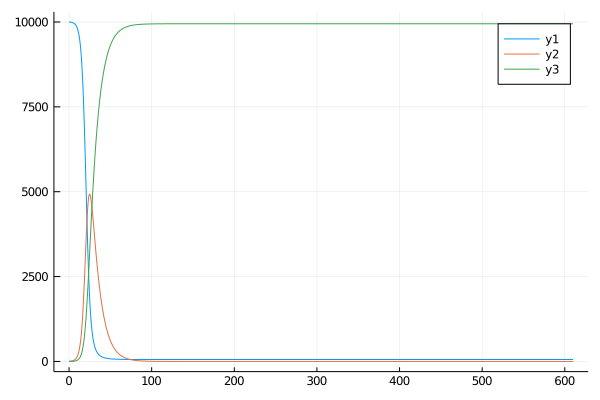

In [21]:
plot(timevec, resultvals)

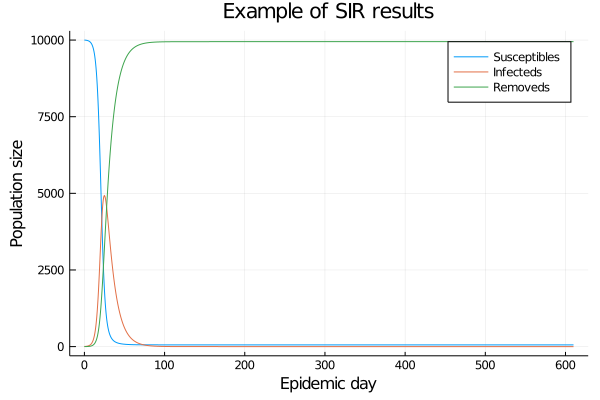

In [22]:
plot(timevec, resultvals,
title = "Example of SIR results",
xlabel = "Epidemic day",
ylabel = "Population size",
label = ["Susceptibles" "Infecteds" "Removeds"])

# More on SIR models

## The threshold prediction of our SIR model


In [29]:
# The updated values
gam = 1/20
lambda = 2.3e-8
dt = 0.5
tfinal = 610.;
s0 = 22.0e6
i0 = 4.
r0 = 0.

nsteps = round(Int64, tfinal/dt)
resultvals = Array{Float64}(undef, nsteps+1, 3)
timevec = Array{Float64}(undef, nsteps+1)
resultvals[1,:] = [s0, i0, r0]
timevec[1] = 0.

for step = 1:nsteps
    resultvals[step+1, :] = updateSIR(resultvals[step, :])
    timevec[step+1] = timevec[step] + dt
end

In [30]:
using Plots
gr()

Plots.GRBackend()

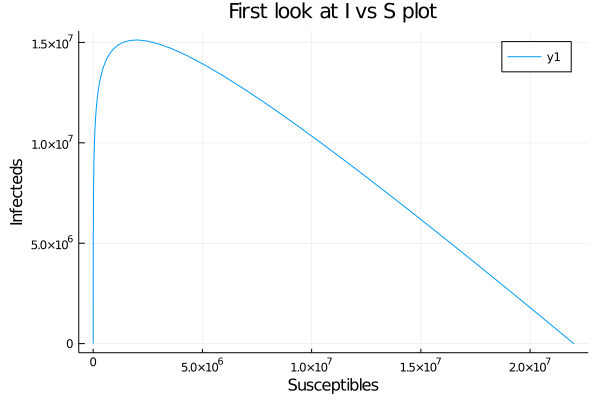

In [31]:
svals = resultvals[:, 1];
ivals = resultvals[:, 2];

plot(svals, ivals,
title="First look at I vs S plot",
xlabel="Susceptibles",
ylabel="Infecteds")

## Putting it all together: estimates of gamma and lambda

---

# Plotting Data and an Approximately Fitted Line Simultaneously

## Julia's modify-the-argument functions


In [1]:
tempvar = Array{Any}(undef, 4)
fill!(tempvar, "hello ... world")

4-element Array{Any,1}:
 "hello ... world"
 "hello ... world"
 "hello ... world"
 "hello ... world"

In [2]:
fill!(tempvar, 777)

4-element Array{Any,1}:
 777
 777
 777
 777

## The difference between `plot` and `plot!`

- Use the first example, but with the differences

## An example: approximating the cosine function

In [7]:
function approxcos(x)
    outval = Array{Any}(undef, size(x))
    ii = 0
    for aa in x
        y = 1 - aa^2/2 + aa^4/24 - aa^6/720 + aa^8/(56*720)
        ii = ii+1
        outval[ii] = y
    end
    return outval
end

x1 = 4*rand(10)
x2 = range(0., stop=4., step=0.01)

y1 = approxcos(x1)
y2 = cos.(x2);

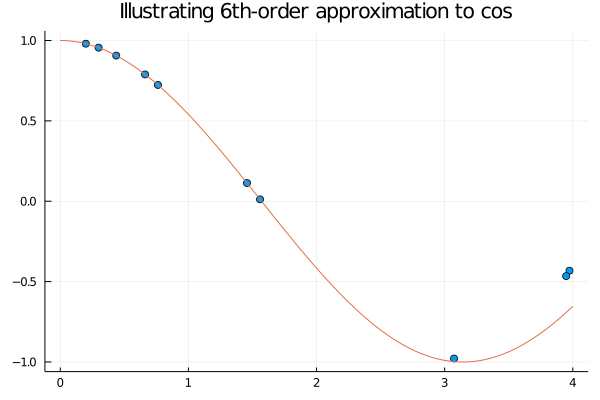

In [8]:
using Plots; gr()

scatter(x1, y1, legend=:false, title="Illustrating 6th-order approximation to cos")
plot!(x2, y2)